Redes Neuronales Convulocionales (CNN) 

Son un tipo de red neuronal diseñada para procesar datos con una estructura de tipo grid, como imágenes. Utilizan capas convolucionales para extraer características relevantes del input mediante filtros (kernels), lo que las hace especialmente efectivas para tareas de reconocimiento y clasificación de imágenes.




Ejemplo de una CNN unidimensional.

In [87]:
import numpy as np

s = [2,3,5,7,11]
w = [-1, 1]

def convolve(sequence, weights):
    convolution = np.zeros(len(sequence)- len(weights)+1)
    print(convolution)
    print(convolution.shape)
    for i in range(convolution.shape[0]):
        convolution[i] = np.sum(
            np.array(
                weights * np.array(
                    sequence[i:i + len(weights)])
                ))
    return convolution
convolve(s,w)


[0. 0. 0. 0.]
(4,)


array([1., 2., 2., 4.])

Ahora procederemos con un CNN bidimensional para una imagen

In [88]:
import numpy as np

s = [[2, 1, 3], 
     [4, 0, 2], 
     [1, 5, 6]]

w = [[-1, -2], 
     [1,   2]]
def convolve(sequence, weights):
     np.array(sequence)
     sequence = np.array(sequence)   
     weights = np.array(weights)
     output_shape = (
          sequence.shape[0] - weights.shape[0] + 1, 
          sequence.shape[1] - weights.shape[1] + 1
     )
     convolution = np.zeros(output_shape)

     for i in range(output_shape[0]):
          for j in range(output_shape[1]):
               region = sequence[i:i+weights.shape[0], j:j+weights.shape[1]]
               convolution[i,j] = np.sum(region * weights)

     return convolution

convolve(s,w)


array([[ 0., -3.],
       [ 7., 13.]])

## Capas Convolucionales en Keras

Ahora veremos cómo funcionan las capas convolucionales en Keras.
Vamos a crear una capa convolucional llamada Conv2D.

Esto es lo que significan todos los parámetros:

- filters: el número de filtros, que corresponde al tamaño del tensor de output.

- kernel_size: las dimensiones espaciales del filtro K. Todo filtro es un tensor de tamaño K×K×D, donde D es igual a la profundidad de la imagen de input.

- strides: un paso (o stride) determina cuán lejos se desplaza el filtro sobre la matriz de input. De forma predeterminada, está configurado en 1.

- padding: este parámetro define el ancho del padding cero. Hay dos tipos de padding: valid (válido) y same (igual). El tipo por defecto es valid y es igual a cero. Same establece el tamaño del padding automáticamente de modo que el ancho y la altura del tensor de output sea igual al ancho y la altura del tensor de input.

- activation: esta función se aplica inmediatamente después de la convolución. Puedes usar las funciones de activación que ya conoces: 'relu' y 'sigmoid'. De manera predeterminada, este parámetro es None, o sea que la activación está deshabilitada.

- input_shape: Especifica el tamaño del tensor

## Entrenando modelo CNN en Keras

In [89]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, Flatten, Dense,Input
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X_train = np.load("D:/Tripleten/datasets/fashion_mnist/train_features.npy")
y_train = np.load("D:/Tripleten/datasets/fashion_mnist/train_target.npy")

X_test = np.load("D:/Tripleten/datasets/fashion_mnist/test_features.npy")
y_test = np.load("D:/Tripleten/datasets/fashion_mnist/test_target.npy")


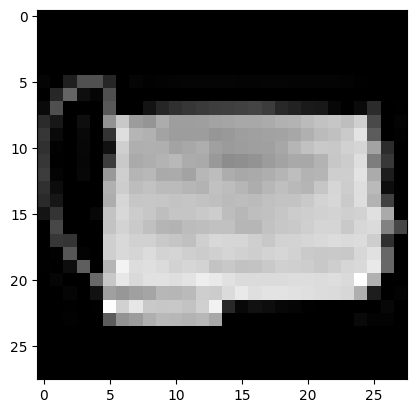

In [90]:
image = Image.fromarray(X_train[np.random.randint(1,len(X_train))])
# image.show()
plt.imshow(image, cmap='gray')

In [99]:
X_train.shape[1:]

(28, 28, 1)

In [92]:
X_train= X_train.reshape(-1,X_train.shape[1],X_train.shape[2],1)/255
X_test= X_test.reshape(-1,X_test.shape[1],X_test.shape[2],1)/255

In [100]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1:])))
model.add(
    Conv2D(
        filters=4,
        kernel_size=(3,3),
        strides=1,
        padding='valid',
        activation='relu',
        )
)

model.add(
    Conv2D(
        filters=4,
        kernel_size=(3,3),
        strides=2,
        padding='same',
        activation='relu',
    ) 
)

model.add(Flatten())
model.add(Dense(units=10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])

model.summary()

model.fit(X_train,
          y_train, 
          validation_data=(X_test,y_test), 
          epochs=5,
          verbose=2)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 4)      │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 13, 13, 4)      │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 676)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         6,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,958 (27.18 KB)

 Trainable params: 6,958 (27.18 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 - 5s - 3ms/step - acc: 0.7386 - loss: 0.7389 - val_acc: 0.8029 - val_loss: 0.5647
Epoch 2/5
1875/1875 - 4s - 2ms/step - acc: 0.8100 - loss: 0.5382 - val_acc: 0.8018 - val_loss: 0.5592
Epoch 3/5
1875/1875 - 4s - 2ms/step - acc: 0.8235 - loss: 0.5037 - val_acc: 0.8094 - val_loss: 0.5430
Epoch 4/5
1875/1875 - 5s - 3ms/step - acc: 0.8304 - loss: 0.4831 - val_acc: 0.8281 - val_loss: 0.4883
Epoch 5/5
1875/1875 - 4s - 2ms/step - acc: 0.8369 - loss: 0.4677 - val_acc: 0.8246 - val_loss: 0.4901


## Arquitectura LenNet

En esta lección, aprenderás sobre operaciones de pooling (agrupación) y arquitectura LeNet.
Con las técnicas de pooling, puedes reducir el número de los parámetros del modelo. Un ejemplo de esto es la operación Max Pooling, que se hace así:

Se determina el tamaño del kernel (por ejemplo, 2x2).
El kernel comienza a moverse de izquierda a derecha y de arriba a abajo; en cada cuadro de cuatro pixeles hay un pixel con el valor máximo.
El pixel con el máximo valor se mantiene, mientras que los que le rodean desaparecen.
El resultado es una matriz formada solo por los pixeles con los valores máximos.

- MaxPooling devuelve el valor máximo de pixel del grupo de pixel dentro de un canal. Si la imagen de input tiene un tamaño de W×W, entonces el tamaño de la imagen de output es W/K, donde K es el tamaño del kernel.
- AveragePooling devuelve el valor promedio de un grupo de pixeles dentro de un canal.

In [ ]:
#Ejemplo de visualización
import tensorflow.keras.layers

tensorflow.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', ...)


Parametros AveragePooling2D y Maxpooling2D

- pool_size: tamaño de pooling (agrupación). Cuanto más grande sea, más pixeles vecinos se involucran.
- strides: un paso (o stride) determina cuán lejos se desplaza el filtro sobre la matriz de input. Si se especifica None, el paso es igual al  tamaño de pooling.
- padding: este parámetro define el ancho del padding cero. El tipo predeterminado del padding es valid, que es igual a cero. Same establece el tamaño del padding automáticamente.

### Grafo Computacional

In [9]:
import torch

# Definir los tensores w, x, b, y_true
w = torch.tensor([[1.0, 2.0], [3.0, 4.0]], requires_grad=True)
x = torch.tensor([[5.0, 6.0], [7.0, 8.0]], requires_grad=True)
b = torch.tensor([9.0, 10.0], requires_grad=True)
y_true = torch.tensor([11.0, 12.0])

# Calcular z
z = torch.matmul(w, x)

# Calcular y_hat
y_hat = z + b

# Calcular error e
e = y_hat - y_true

# Calcular pérdida l
l = torch.sum(e ** 2)

# Realizar la retropropagación
l.backward()
# Ahora puedes acceder a los gradientes de w, x y b usando w.grad, x.grad y b.grad respectivamente
print(w.grad)


tensor([[ 410.,  558.],
        [ 986., 1342.]])


### Generador de imagenes




In [140]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
    
datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255.)

train_datagen_flow = datagen.flow_from_directory(
    'D:/Tripleten/datasets/fruits_small/',
    target_size=(150,150),
    batch_size=16,
    class_mode='sparse',
    seed=12345,
    subset='training'
)


val_datagen_flow = datagen.flow_from_directory(
    'D:/Tripleten/datasets/fruits_small/',
    target_size=(150,150),
    batch_size=16,
    class_mode='sparse',
    seed=12345,
    subset='validation'
)
model = Sequential()
model.add(
    Conv2D(
        filters=6,
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(150, 150, 3),
    )
)
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=12, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc']
)

model.fit(
    train_datagen_flow,
    validation_data=val_datagen_flow,
    steps_per_epoch=len(train_datagen_flow),
    validation_steps=len(val_datagen_flow),
)

Found 1266 images belonging to 12 classes.
Found 417 images belonging to 12 classes.
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - acc: 0.3277 - loss: 2.4649 - val_acc: 0.6978 - val_loss: 0.9730


- target_size=(150, 150): argumento con el ancho y alto objetivo de la imagen. Las carpetas pueden contener imágenes de distintos tamaños pero las redes neuronales necesitan que todas sean de las mismas dimensiones.

- batch_size=16: el número de imágenes en los lotes. Cuantas más imágenes haya, más eficaz será el entrenamiento del modelo. No cabrán demasiadas imágenes en la memoria de la GPU, así que 16 es el valor perfecto para iniciar.
- сlass_mode='sparse': argumento que indica el modo de output de la etiqueta de clase. sparse significa que las etiquetas corresponderán al número de la carpeta.

  Puedes saber cómo se relacionan los números de clase con los nombres de las carpetas de esta manera:

### Aumento de imagenes

En ImageDataGenerator hay muchas maneras de agregar aumentos de imagen. Por defecto, están deshabilitadas.

Estas son:
- horizontal flip
- vertical flip
- widht shit range
- height shift range
- rotation range

Found 1266 images belonging to 12 classes.
Found 417 images belonging to 12 classes.


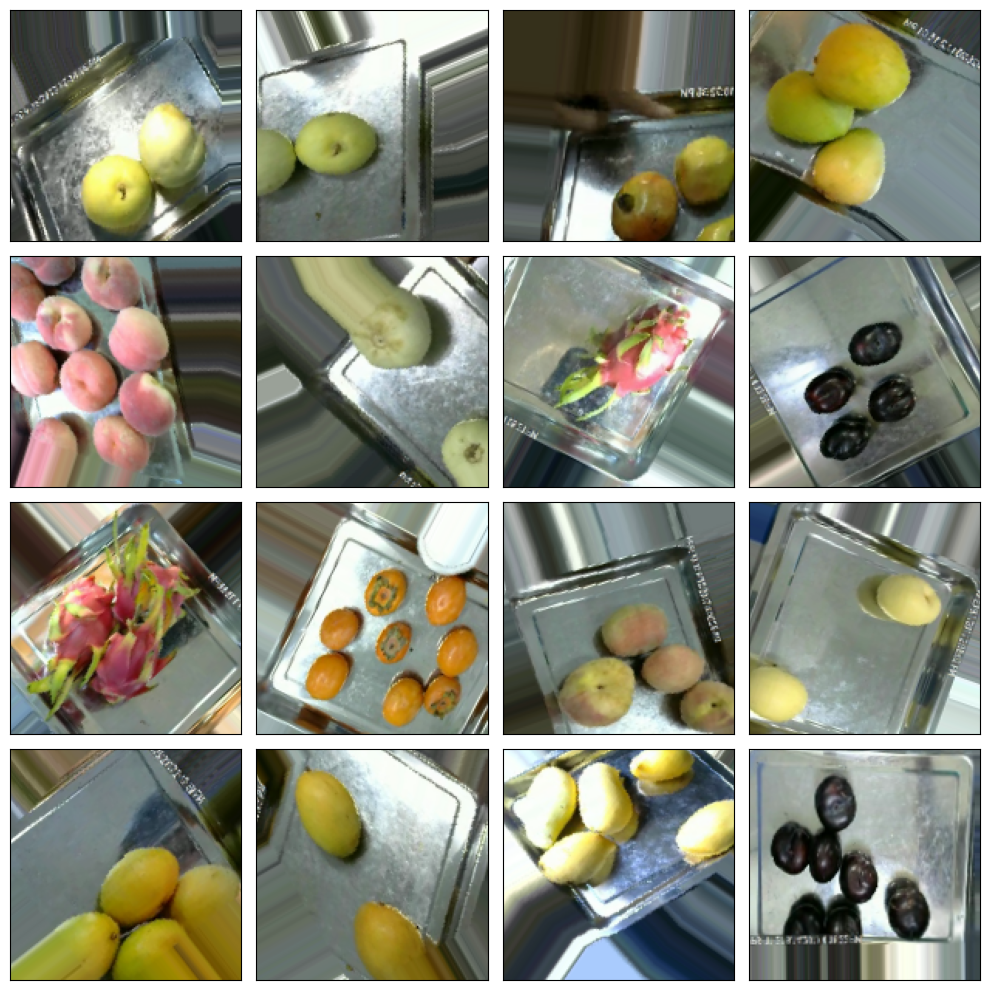

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
 
# crea dos generadores en vez de uno: train_datagen y valid_datagen
train_datagen = ImageDataGenerator(
    validation_split=0.25,
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=90)
    
validation_datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255.)

train_datagen_flow = train_datagen.flow_from_directory(
    directory='D:/Tripleten/datasets/fruits_small/',
    target_size=(150,150),
    batch_size=16,
    class_mode='sparse' ,
    subset='training',
    seed=12345
)

val_datagen_flow = validation_datagen.flow_from_directory(
    'D:/Tripleten/datasets/fruits_small/',
    target_size=(150, 150),
    batch_size=16,
    class_mode='sparse',
    subset='validation',
    seed=12345
)

features, target = next(train_datagen_flow)

# muestra 16 imágenes
fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
	# quita los ejes y coloca las imágenes cerca para obtener un output más compacto
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()